# Missing_DOI_Analysis Pipeline
This pipeline:

1.   Analyzes different statuses of 208 Crossref DOIs that are no longer found in the July 2024 unionlist. We call these DOIs "missing DOIs"

2.   Finds the overlap between missing DOIs and 927 sampled DOIs from Crossref that are indexed as retracted papers

- **Input Files**:

  -  `crossref-retracted-DOIs_reassessment_from_unionlist_completed_2023-09-03_to_2024-07-09.csv`
  -  `crossref_sample_data_validation_set.xlsx`
  -  `crossref_only_all_patterns.csv`



- **Output Files**:

  - `STI2023_missingDOI_overlap_with_sample--crossref_only(Title included).csv`







In [12]:
#import
import os
import pandas as pd
import matplotlib.pyplot as plt

Provide statiscal summary for statuses of DOIs that are no longer found in the June 2024 union list

DataFrame columns:
Index(['DOI', 'Title', 'Status of the DOI in Crossref',
       'Status of the DOI on publisher's website'],
      dtype='object')
DOI Type Counts:
Type_Normalized
retraction notice    176
normal article        20
correction notice     12
Name: count, dtype: int64


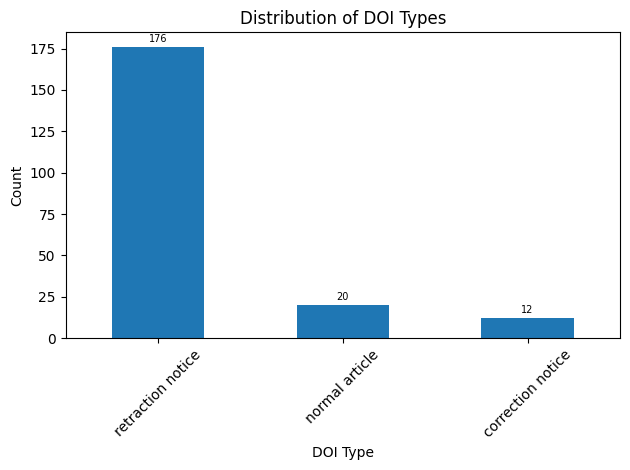

In [13]:
# Read the Excel file and select the 'Crossref' sheet
data_folder = "../data"  
file_path = os.path.join(data_folder, "crossref-retracted-DOIs_reassessment_from_unionlist_completed_2023-09-03_to_2024-07-09.csv")
df = pd.read_csv(file_path)

# Print the column names to help identify the correct one
print("DataFrame columns:")
print(df.columns)

# Clean the type field: standardize missing values, lowercase, remove extra spaces, correct typos
def normalize_type(t):
    if pd.isna(t):
        return "unknown"
    t = t.strip().lower()
    if "retract" in t:
        return "retraction notice"
    if "correction" in t:
        return "correction notice"
    if "normal" in t or "article" in t:
        return "normal article"
    return t

# Apply the normalization function to create a new column
df["Type_Normalized"] = df["Status of the DOI on publisher's website"].apply(normalize_type)

# Count the number of occurrences for each type
type_counts = df["Type_Normalized"].value_counts()

# Display the result
print("DOI Type Counts:")
print(type_counts)

# Create a bar plot to visualize the distribution
ax = type_counts.plot(kind="bar")

# Beautify the chart
plt.title("Distribution of DOI Types")
plt.xlabel("DOI Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels on each bar
for i, v in enumerate(type_counts):
    ax.text(i, v + max(type_counts) * 0.01, str(v), ha='center', va='bottom',fontsize=7)

# Show the plot
plt.show()

In [15]:
# Count the number of occurrences for each value in 'Status of the DOI in Crossref'
pattern_counts = df['Status of the DOI in Crossref'].value_counts(dropna=False)

# Display the result
print("Counts for 'Status of the DOI in Crossref':")
print(pattern_counts)

Counts for 'Status of the DOI in Crossref':
Status of the DOI in Crossref
covered not retracted    208
Name: count, dtype: int64
